# HaMLeT

# Session 2: Supervised Learning

## Goals of this session

At the end of this session, you will have an understanding of the following:
- Difference between supervised and unsupervised learning
- What is meant by Classification in ML
- Supervised Learning:
    - Support Vector Machine (SVM)
    - k-nearest neighbour
    - Linear regression
- Unsupervised Learning:
    - k-means clustering
    - GMM

For most of the tasks in this notebook, we are going to use our knowledge about PCA from last session. So, instead of using the features of the Iris dataset directly, we are going to use the PCA features we calculated last time. It is advisable that you check the difference in results you obtain with the features directly versus with PCA for the tasks below. 

Let's first import some of the useful packages and the Iris dataset using `scikit`. We also perform PCA just as we did last time!

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

np.random.seed(seed=10) # to ensure reproducible reuslts

iris = datasets.load_iris()
features = iris.data[:,[0,1,2,3]]
targets = iris.target 

## Recap: PCA

Data= [[array([-2.26454173, -2.0864255 , -2.36795045, -2.30419716, -2.38877749,
       -2.07053681, -2.44571134, -2.23384186, -2.34195768, -2.18867576,
       -2.16348656, -2.32737775, -2.22408272, -2.63971626, -2.19229151,
       -2.25146521, -2.20275048, -2.19017916, -1.89407429, -2.33994907,
       -1.91455639, -2.2046454 , -2.77416979, -1.82041156, -2.2282175 ,
       -1.95702401, -2.05206331, -2.16819365, -2.14030596, -2.26879019,
       -2.14455443, -1.8319381 , -2.60820287, -2.43795086, -2.18867576,
       -2.2111199 , -2.04441652, -2.18867576, -2.4359522 , -2.1705472 ,
       -2.28652724, -1.87170722, -2.55783442, -1.96427929, -2.13337283,
       -2.07535759, -2.38125822, -2.39819169, -2.22678121, -2.20595417]), array([ 0.5057039 , -0.65540473, -0.31847731, -0.57536771,  0.6747674 ,
        1.51854856,  0.07456268,  0.24761393, -1.09514636, -0.44862905,
        1.07059558,  0.15858745, -0.70911816, -0.93828198,  1.88997851,
        2.72237108,  1.51375028,  0.51430431,  1.43111

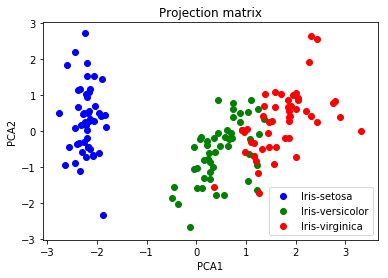

In [24]:
# Data standarization
from sklearn.preprocessing import StandardScaler
features = StandardScaler().fit_transform(features)
# PCA
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
features_PCA = sklearn_pca.fit_transform(features)

species = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
colors = ('blue','green','red')

# Plotting the relationship between PCA1 and PCA2
feature1 = features_PCA[:, 0] 
feature2 = features_PCA[:, 1] 
    
species = ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')
colors = ('blue','green','red')
data = [[features_PCA[np.where(targets == target)][:, feature] for feature in [0, 1]] for target in range(3)]
print("Data=",data)
for item, color, group in zip(data, colors, species):
    plt.scatter(item[0], item[1], color=color)
    plt.title('Projection matrix')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(species)
plt.show()

## 1. Supervised Learning (Classification of the Iris dataset)

Classification tasks aim at predicting the class of a given data sample. For the Iris dataset, we want to predict which one of the three species a given sample belongs to. In supervised learning, we do so by 'learning' a model based on some training samples. We then use this trained model to make predictions on 'unseen' or test-dataset.

Before we dive into any of the algorithms, we need to get introduced to the idea of splitting the datset into train and test sets. 

We know that the Iris dataset consists of 150 samples. Now, we will take 80% of the samples as our training set and the remaining as test set. We calculate the accuracy of our model on the test set. The common ML terminology is as follows: X_train, X_test are, respectively, the feature vectors for training and testing; and y_train and y_test are the corresponding labels for X_train and X_test. The predictions will be stored in y_pred.

**Task:** Using the `train_test_split` function of `sklearn`, split the PCA features obtained above in accordance with the standard ML naming convention (as explained above). 

Tip: Please use the default parameters for the split. You will learn this topic more in details in the next session ;)

In [25]:
# Your code here:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_PCA, targets, test_size=0.20)

print("X train , Size=",X_train.shape)
print("X test , Size=",X_test.shape)
print("Y train , Size=",len(y_train))
print("Y test , Size=",len(y_test))

print("\n")
#print("X train ",X_train)
#print("X Test ",X_test)
#print("Y train ",y_train)
#print("Y Test ",y_test)


X train , Size= (120, 2)
X test , Size= (30, 2)
Y train , Size= 120
Y test , Size= 30




### 1.1 My very own classifier

**Task:** Refer to the PCA plot above and design your own classifier (by completing the assisting code!). For this, you may define simple linear or non-linear conditions to classify the sample points into one of the three classes. 

Example condition: if PCA1 for given sample < -2, sample is Iris-Setosa

In [26]:
# Complete the following lines of code: 

class StudentsClassifier:
    def predict(self, X):
        return np.array([self.predict_single(x) for x in X])
    
    def predict_single(self, X):
        feature1 = X[0]

        feature2 = X[1]
        
        # write a function that returns the index of the class
        # e.g. if Iris-Setosa, return 0 
        
        # Your code here:
        if feature1 < -2:
            return 0
        elif -2 < feature1 < 1:
            return 1
        elif feature1 > 1:
            return 2
        
            
        
        



### 1.2. Qualitative evaluation

Below is a ready-to-use function to visualize classification boundaries. You are not required to understand it in detail but try to understand what inputs/outputs the functions require/produce. You will need to use these later in the notebook. 

In [27]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, X, y, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    fig, ax = plt.subplots(constrained_layout=True)
    
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.7)
    
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    plt.show()



**Task:** Using the function $plot\_contours$, visualize the training boundaries obtained by your classifier by providing the correct arguments to it. 

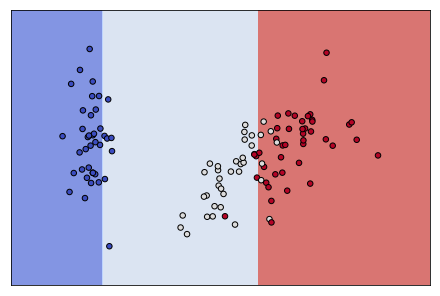

In [28]:
# Calling your classifier
my_clf = StudentsClassifier()
# Visualizing class boundaries for my_clf
# Your code here:
plot_contours(my_clf,X_train,y_train)


### 1.3. Quantitative evaluation

**Task:** First 'predict' the classes for X_test using the classifier you just defined above. And then calculate the accuracy on this test dataset. Use `scikit`'s `accuracy_score`.

Hint: First import the necessary module.

In [29]:
# Your code here:
from sklearn.metrics import accuracy_score

my_clf = StudentsClassifier()
y_predicted = my_clf.predict(X_test)
# y_pred = ? # Complete the code!

print(accuracy_score(y_test,y_predicted))




0.9


### 1.4. Support Vector Machine

SVMs are a powerful and flexible class of supervised algorithms for both classification and regression. They are memory efficient in that they use only a subset of the training points in the decision function (called support vectors). The simplest SVM uses a linear kernel to separate classes. 

**Task:** Using `sklearn`'s `svm`, implement a SVM with a linear kernel. Also perform a qualitative and a quantitative evaluation just as you did previously. 

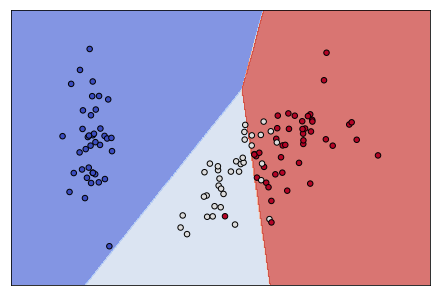

0.90833333333333333

In [34]:
from sklearn import svm

# Example code: LinearSVC
clf0 = svm.LinearSVC() # SVC = Support Vector Classifier
# train clf0 on X_train and y_train
clf0.fit(X_train, y_train)
# visualize 
#accuracy_score(y_train, y_pred_clf0)

plot_contours(clf0, X_train, y_train)

# Your code here:
# train clf0 on X_train and y_train

# visualize 
#plot_contours(clf0, X_test, y_test)
y_pred_clf0 = clf0.predict(X_train)

accuracy_score(y_train, y_pred_clf0)

**Question:** How is it in comparison to the your classifier? (Compare the accuracies).

Answer: 

1. My classifier is overfitting
2. In SVM misclassification is less



### 1.4. More on accuracy metrics

The Confusion Matrix provides a better summary of the classification performance than just the accuracy score. The latter is often not the best measure for classification tasks involving more than two classes. Calculating a confusion matrix can give you a better idea of what your classification model is getting right and what types of errors it is making.

**Task:** Read up on Confusion Matrix if you are not familiar with the term. Then using `sklearn`'s `confusion_matrix` draw it and try to understand the perfomance of your classifier. 

Tip: You may also want to look into `sklearn`'s `classification_report` function. 

In [36]:
# Your code here:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predicted))

print("\n")
y_train_predicted = my_clf.predict(X_train)
print(confusion_matrix(y_train,y_train_predicted))

import sklearn.metrics as met
print(met.confusion_matrix(y_test, y_predicted, labels=None, sample_weight=None))
print(met.classification_report(y_test,y_predicted
                               ))

[[10  0  0]
 [ 0 10  3]
 [ 0  0  7]]


[[33  7  0]
 [ 0 30  7]
 [ 0  4 39]]
[[10  0  0]
 [ 0 10  3]
 [ 0  0  7]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      0.77      0.87        13
          2       0.70      1.00      0.82         7

avg / total       0.93      0.90      0.90        30



### 1.5. Tuning the Hyperparameters

There are several parameters that can help achieve better results (introduced in the Preparatory Material). 

- Kernel: Depending on the (expected) distribution of our classes, we can choose different types of functions, eg. linear, polynomial, and radial basis function (RBF). As might be obvious, the latter two are useful for non-linear hyperplane.

- Regularization: `C` in scikit-learn is a penalty parameter that controls the flexibility allowed to the hyperplane. A smaller value of C creates a small-margin hyperplane and a larger value creates a larger-margin hyperplane. 

- Gamma: This defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. A small gamma value define a Gaussian function with a large variance. In this case, two points can be considered similar even if are far from each other. In the other hand, a large gamma value means define a Gaussian function with a small variance and in this case, two points are considered similar just if they are close to each other.

**Task:** With a simple trial and error approach try to visualize and understand the effect of the hyperparameters and find an optimum classifier for the given dataset. You may use the metrices you learnt about to evaluate the performance of the different classifiers.

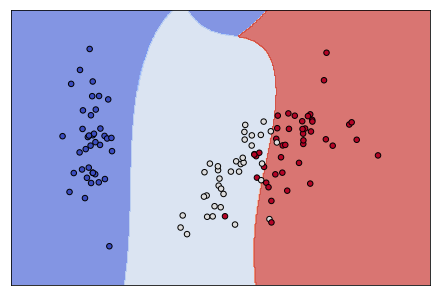

0.90000000000000002

In [37]:
# Your code here:

clf0 = svm.SVC(kernel = 'poly',C = 1,gamma = 'auto') # SVC = Support Vector Classifier
# train clf0 on X_train and y_train
clf0.fit(X_train, y_train)
# visualize
plot_contours(clf0, X_train, y_train)
y_pred_clf0 = clf0.predict(X_test)
accuracy_score(y_test, y_pred_clf0)

### 1.6. k-nearest neighbour (knn)

### knn Algorithm

- Define a distance metric (Euclidean distance)
- Choose a value for k (= the number of nearest neighbours) 
- Take k-nearest neighbors of the new data point, according to your distance metric
- Assign the new data point the same category as its nearest neighbors

### 1.7. My very own knn classifier

We define our own knn classifier according to the above algorithm. 

**Task (Step 1):** Define a function that calculates the euclidean distance between two points. 

In [40]:
from numpy import linalg as la
def my_ecd(v1, v2):
    # Your code here:
    return la.norm(v1-v2)

l1 = np.array([2,3])
l2 = np.array([8,5])
my_ecd(l1,l2) 



6.324555320336759

**Task (Step 2):** Define a function that uses my_ecd to calculate the distance between one single test data point with *all* the training data points. Save the distances *along with their respective indices* in a list. Return the *sorted* list as the output of the function. 

Hint: 1. To get indices, you may want to use `enumerate`.        2. You may use the function `sort` or `sorted`.

In [41]:
def my_distance_metric(X_train, single_test):
    """Calculates the distance between one test sample X_test and every sample in X_train.

    Parameters:
    X_train = all available training samples
    single_test = one particular test sample
    k = number of nearest neighbours
    -----------
    Returns: sorted distance list  
    """
    dist_list = []
    
    # Your code here:
    # Define a for-loop to compute distance
    ind =np.arange(X_train.shape[0])
    for i in ind:
        item = X_train[i,:]
        dist = my_ecd(item,single_test)
        dist_list.append(dist)
        
    dist_list =[i[0] for i in sorted(enumerate(dist_list), key=lambda x:x[1])]
    return dist_list

l1 = np.array([2,3])
dist_list = my_distance_metric(X_train,l1)
print(dist_list)

#print((list(enumerate(list(dist_list)))))

[42, 21, 19, 99, 118, 6, 92, 7, 106, 41, 98, 9, 52, 36, 44, 108, 34, 68, 2, 16, 14, 103, 113, 90, 29, 64, 24, 85, 97, 102, 69, 58, 43, 17, 60, 78, 59, 0, 94, 70, 51, 8, 72, 105, 45, 27, 1, 3, 23, 114, 111, 18, 48, 57, 66, 104, 39, 65, 53, 71, 4, 116, 49, 38, 80, 75, 115, 117, 91, 55, 25, 107, 12, 100, 56, 47, 84, 82, 87, 26, 96, 28, 11, 20, 15, 62, 88, 76, 81, 32, 63, 10, 73, 67, 110, 54, 109, 22, 101, 61, 33, 74, 46, 93, 77, 30, 89, 35, 50, 119, 83, 37, 5, 79, 31, 86, 40, 112, 95, 13]


**Taks (Step 3):** Define a function to save the first k target values corresponding to dist_list obtained above. 

In [42]:
def my_target_list(dist_list, y_train, k): 
    # Your code here:
    # make a list of the k neighbors' targets
    target_ind = dist_list[0:k]
    target_list = []
    for i in target_ind:
        target_list.append(y_train[i])

    return target_list
tarList = my_target_list(dist_list,y_train,20)
print(tarList)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1]


**Task (Step 4):** Define a function that assigns predictions to the test data points. 

Hint: Use `most_common`method from the `Counter` object to get the target that occurs maximum number of times.

In [43]:
from collections import Counter

def my_predict(target_list):
    cnt = Counter()
   # num = target_list[0] 
    for tar in target_list:
        cnt[tar] += 1
      
#    for i in target_list: 
#        curr_frequency = target_list.count(i) 
##        if(curr_frequency> counter): 
#            counter = curr_frequency 
#            num = i 
    cnt=list(dict(cnt.most_common(2)).keys())[0]
    return cnt

#cnntt=(my_predict(tarList))
#print(type(cnntt))
#print(dict(cnntt.most_common(2)))
#dd=dict(cnntt.most_common(2))
#dd1=dd.keys()
#print(list(dd1)[0])



**Task (Step 5):** Finally define a function that loops through all data points predicting each one by one.

In [44]:
def my_knn(X_test, X_train, y_train, k):    
    all_predictions = []
    # Your code here:
    # define a for-loop to loop through all the test data points 
    # to get the predictions for each one of them individually 
    for item in X_test:
        dist_metric = my_distance_metric(X_train, item)
        target_list = my_target_list(dist_metric, y_train, k)
        all_predictions.append(my_predict(target_list))
        
    return all_predictions




**Task:** Use the knn-function
to predict X_test and calculate the accuracy. 

In [45]:
# Your code here:
from sklearn.metrics import accuracy_score
print(len(y_test))
print(y_test)
y_predict = my_knn(X_test, X_train, y_train, 3)
print(len(y_predict))
print(y_predict)

print("The accuracy score of the KNN:\n",accuracy_score(y_test, y_predict))



30
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]
30
[2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 2, 2]
The accuracy score of the KNN:
 0.9


**Task:** Use the built-in knn classifier from `scikit-learn`

In [46]:
# Your code here:
#from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_predict=neigh.predict(X_test)
print(y_test)
print(neigh.predict(X_test))
print("The accuracy score of the KNN",accuracy_score(y_test, y_predict))

[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]
[2 2 0 1 0 1 2 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 2 2]
The accuracy score of the KNN 0.9


**Question:** How does your knn classifier perform in in comparison to the built-in function? 

Answer:



## 2. Unsupervised Learning 

Until now we always worked with features and targets (labels) of the given dataset. In unsupervised learning, we do not have any labels for the data. For classification task, here, we will rely on some clustering algorithms. 

In this section, we will see the K-means and Gausssian Mixture Model (GMM) clustering methods. These agorithms require us to 'guess' how many clusters (classes) we have. 

### 2.1. K-means 

This is the simplest clustering algorithm. We initialize the algorithm with 'k' clusters according to which we get 'k' centroids. The algorithm then iteratively assigns every datapoint to its nearest cluster. The 'means' in its name refers to averaging of the data, i.e., finding the centroid.

**Task:** Perform unsupervised classification using `sklearn's` `KMeans`. To check your results, print out the output lables and compare with the target values. 

Note: For this task we ignore the several optional parameters. Providing only the `n_clusters` argument will suffice for this task. 

**Question:** Before you begin the task, think about which dataset should you work with here? 

Hint: Unsupervised learning = NO labels available

Answer: X_Train of iris dataset

In [47]:
# Your code here:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X_train)
y_kmeans = kmeans.predict(X_train)
print(y_kmeans)

#print("Is 2 sets equal =",np.argwhere(y_kmeans == y_test))



[2 2 0 2 2 1 0 0 0 0 1 1 2 1 0 1 0 0 2 0 2 0 2 2 0 1 1 2 1 0 1 1 2 2 0 1 0
 1 2 2 1 0 0 0 0 2 1 2 0 2 1 0 0 2 1 1 1 2 0 0 0 1 1 1 0 2 2 2 0 0 2 2 2 1
 1 2 1 1 0 2 1 1 1 2 1 0 1 2 2 1 0 2 0 1 2 1 2 0 0 0 1 2 0 0 2 2 0 1 0 1 1
 2 1 0 2 2 2 1 0 1]


**Question:** Is it informative to compare the labels and the targets? Explain.

Answer: Yes, K means is not accurate



### 2.2 Visualization of labels

I hope by now it is clear to you why calculating accuracy as done previously does not make sense in this case. Hence, we perform a simple visualization to assess the performance. 

**Task:** Plot the results of the kmeans function as a scatter plot (similar to PCA). 

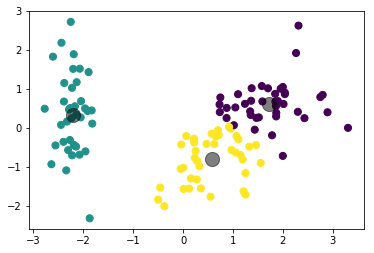

In [48]:
# Your code here:

# Optional: Plotting the centroids of the clusters
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 70, c = 'black')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#plt.scatter(X_train[:,0], X_train[:,1], s = 70, cmap='viridis')
plt.show()

### 2.3 The Elbow Method

In a truly unsupervised learning scenario, how could we make the initial guess for the number of custers? One option is The Elbow Method.

The basic idea behind cluster partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation, or total within-cluster sum of square (wcss), is minimized. In the Elbow Method, we plot the WCSS against a set of values for 'k' and the location of a bend (elbow) in the plot is generally considered as an indicator of the appropriate number of clusters.

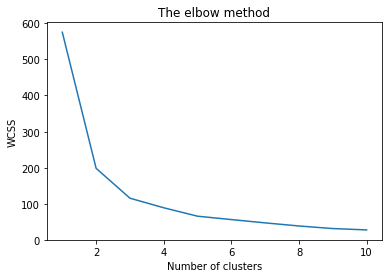

In [20]:
#Finding the optimum number of clusters for k-means classification
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_PCA)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

**Question:** What is the optimum number of clusters according to the Elbow Method? 

Answer: 5

### 2.4 GMM

As we saw, Kmeans might not always provide the most optimum output because it deos not have any intrinsic measure of probability or uncertainty of cluster assignments. A major limitation of k-means is that the cluster models must be circular: k-means has no built-in way of accounting for oblong or elliptical clusters.

Gaussian mixture models (GMMs) offer an extension to the idea of kmeans and provide a better estimation. They attempt to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. While Kmeans is a method that performs hard labeling, i.e., it simply choses the maximum probability, GMM provide soft labeling by looking at all the probabilities instead of only maximum. 

**Task:** Try out GMM using `sklearn`'s `GaussianMixture`. Display the probabilities that are assigned to every sample to understand the concept of soft-labeling as explained above. You may also plot the clusters for visualization. 

Tip: Round the probabilities up to two decimal places before displaying.

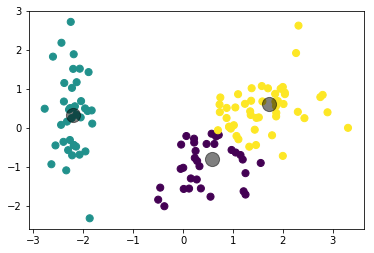

In [49]:
# Your code here:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3)
gmm.fit(X_train)
labels = gmm.predict(X_train)



#plt.scatter(X_train[:,0], X_train[:, 1], s=40, cmap='viridis');

#probs = gmm.predict_proba(X_train)
#print(probs)

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#plt.scatter(X_train[:,0], X_train[:,1], s = 70, cmap='viridis')
plt.show()


## 3. Bonus task 

**Task1:** For the above methods, it is highly interesting to work with the features directly without performing PCA. Compare performances of the methods with the results you obtained above with features_PCA.

**Task2:** Perform a simple linear regression using `sklearn`'s built-in function on some randomly generated data. 

In [22]:
# Your code here:




## 4. Feedback Cell

Hopefully you enjoyed this tutorial and learned some important classification methods used commonly in ML. Please leave your comments about what you liked/disliked in the session. Any suggestions are welcome!

Your feedback:

